## CSVLogger のメトリクスログを解析・ matplotlib でグラフ化


In [53]:
import glob

csv_logdir = "../log/fmnist/gamma_search_sgd_all_786/trial=*/gamma=*/csv"
metrics_files = sorted(glob.glob(f"{csv_logdir}/**/metrics.csv", recursive=True))
metrics_files

['../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.0/csv/lightning_logs/version_1/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.1/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.2/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.30000000000000004/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.4/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.5/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.6000000000000001/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.7000000000000001/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all_786/trial=0/gamma=0.8/csv/lightning_logs/version_0/metrics.csv',
 '../log/fmnist/gamma_search_sgd_all

In [54]:

def metrics_parser(metrics_path):
    trial_str, gamma_str = metrics_path.split("/")[-6], metrics_path.split("/")[-5]
    trial = int(trial_str.replace("trial=", ""))
    gamma = float(gamma_str.replace("gamma=", ""))
    gamma = round(gamma, 3)
    return trial, gamma

In [55]:
import pandas as pd

metrics_path = metrics_files[0]
trial, gamma = metrics_parser(metrics_path)
df = pd.read_csv(metrics_path)
df

,train_recon_loss,train_kl,train_loss,epoch,step,val_recon_loss,val_kl,val_loss
0,0.169792,13.619684,13.789475,0,49,NaN,NaN,NaN
1,0.174829,10.379066,10.553896,0,99,NaN,NaN,NaN
2,0.177765,5.931282,6.109046,0,149,NaN,NaN,NaN
3,0.169586,3.794078,3.963663,0,199,NaN,NaN,NaN
4,0.170822,3.842397,4.013219,0,249,NaN,NaN,NaN
5,0.168175,2.631203,2.799378,0,299,NaN,NaN,NaN
6,0.175728,2.949944,3.125672,0,349,NaN,NaN,NaN
7,0.163231,1.819711,1.982942,0,399,NaN,NaN,NaN
8,0.163540,1.518503,1.682043,0,449,NaN,NaN,NaN
9,0.176125,1.562136,1.738261,0,499,NaN,NaN,NaN


100%|██████████| 400/400 [00:00<00:00, 713.55it/s]


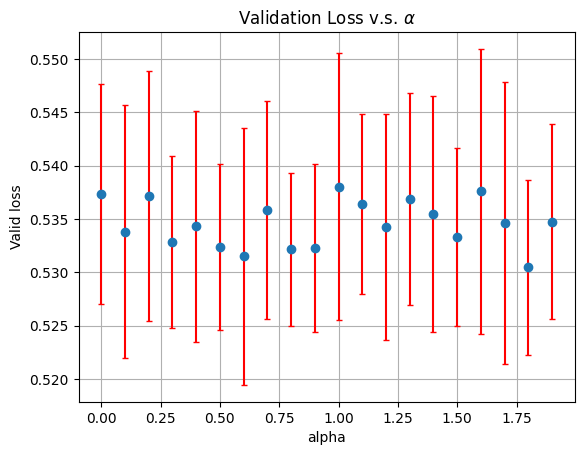

In [56]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        metrics = df.iloc[30]["val_loss"]
        # metrics = df.iloc[25]["val_recon_loss"]
        # metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue
    
    

# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid loss')
plt.title(r'Validation Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|██████████| 400/400 [00:00<00:00, 851.12it/s]


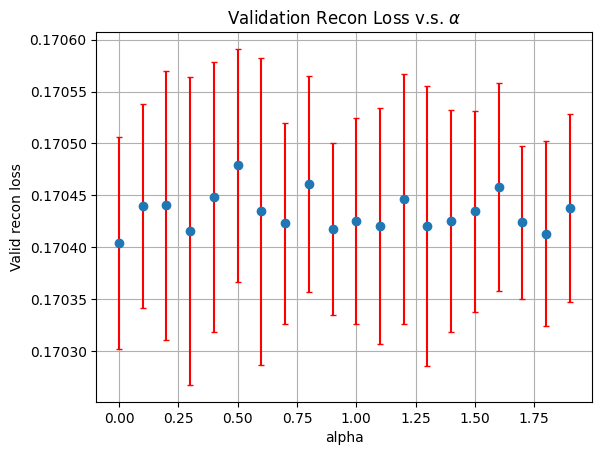

In [57]:
results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        # metrics = df.iloc[25]["val_loss"]
        metrics = df.iloc[30]["val_recon_loss"]
        # metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue


# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid recon loss')
plt.title(r'Validation Recon Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|██████████| 400/400 [00:00<00:00, 839.56it/s]


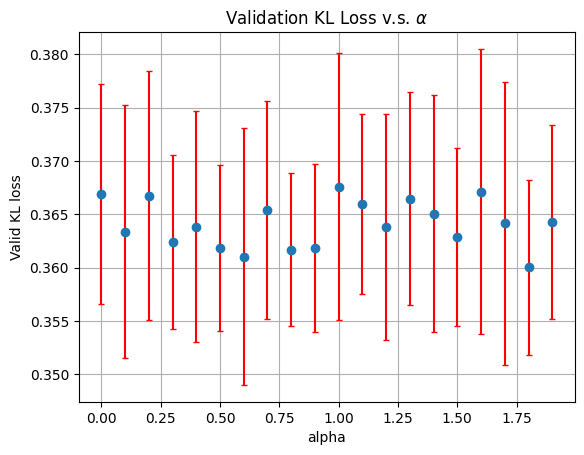

In [58]:
results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        # metrics = df.iloc[25]["val_loss"]
        # metrics = df.iloc[25]["val_recon_loss"]
        metrics = df.iloc[30]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue
    
    

# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid KL loss')
plt.title(r'Validation KL Loss v.s. $\alpha$')
plt.grid()
plt.show()

In [59]:
csv_logdir = "../log/scale_free_vae/gamma_zero_vanilla_vae/trial=*/gamma=*/csv"
metrics_files = sorted(glob.glob(f"{csv_logdir}/**/metrics.csv", recursive=True))

results = dict()
for path in tqdm(metrics_files):
    trial, gamma = metrics_parser(path)
    df = pd.read_csv(path)
    
    for key in ["val_loss", "val_recon_loss", "val_kl"]:
        if key not in results:
            results[key] = []
            
        metrics = df.iloc[30][key]
        results[key].append(metrics)
        
    for key in ["train_loss", "train_recon_loss", "train_kl"]:
        if key not in results:
            results[key] = []
        
        metrics = df.iloc[0:30][key]
        results[key].append(metrics)


for key, metrics in results.items():
    mean = np.mean(metrics)
    std = np.std(metrics)
    print(f"{key}: mean {mean} std {std}")

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: single positional indexer is out-of-bounds

- `hparams.yaml` の中身:
    ```yaml
    lr: 0.01
    n_hid: 100
    n_vis: 784
    normalize_loss: false
    optimizer_name: sgd
    power_law_gamma: 9.5
    ```
- `metrics.csv` の中身: logger に放り込んだ値がごちゃっと入っている